# Package Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px
import networkx as nx
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
import math
import mpld3
from mpld3 import plugins
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
from collections import Counter
import itertools

%matplotlib inline

In [27]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# DataFrame Imports

In [5]:
prototype_frame = pd.read_csv("./Data/prototype_frame.csv", low_memory=False, index_col=0)

prototype_frame

,advantage_mean,believability_mean,purchase_likelihood_mean,premiumness_mean,concept_id,one or multiple flavors_mapped_clean_One Flavour,one product or product mix_mapped_clean_One Product,ingredients mentioned in the flavor names_mapped_clean_Cheese,types of snack does it describe_mapped_clean_Puffs,types of snack does it describe_mapped_clean_Chips,...,cuisines of origin_mapped_clean_Spanish,types of snack does it describe_mapped_clean_Rice-cakes,cuisines of origin_mapped_clean_Greek,cuisines of origin_mapped_clean_Moroccan,preparation or cooking method_mapped_clean_Charred,taste profile_mapped_clean_Tart,taste profile_mapped_clean_Caramelized,preparation or cooking method_mapped_clean_Pressure cooked,preparation or cooking method_mapped_clean_Grilled,mean_of_metrics
0,3.866748,4.109224,3.924676,3.633249,45561,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3.883474
1,3.598365,3.995791,3.850502,3.416570,45562,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3.715307
2,3.496965,4.052792,3.720136,3.385568,45563,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3.663865
3,3.794805,4.136182,4.173971,3.605408,45564,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.927591
4,3.420002,3.977261,3.597212,3.421862,45565,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3.604084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,3.671478,4.105840,4.000096,3.535410,147533,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.828206
713,3.651767,4.088976,3.886853,3.564584,147534,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.798045
714,3.604257,4.099988,3.905659,3.414599,147535,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.756126
715,3.383851,3.967173,3.523927,3.375752,147536,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.562676


In [3]:
# Input columns = Tags In prototype_frame
# Output column = mean_of_metrics (scroll to the very end of the dataframe -->) 

## Separate features (X) and target variable (y)

In [8]:
features = ['types of snack does it describe_mapped_clean_Pretzels', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_Perfect for dipping', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_As a treat', 'ingredients mentioned in the flavor names_mapped_clean_Herbs and Spices', 'explicitly claimed health or lifestyle benefits_mapped_clean_High Protein', 'textures described_mapped_clean_Crunchy', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_Grazing', 'types of snack does it describe_mapped_clean_Popcorn', 'ingredients mentioned in the flavor names_mapped_clean_Ranch', 'shapes mentioned_mapped_clean_Flat', 'types of snack does it describe_mapped_clean_Popped', 'types of snack does it describe_mapped_clean_Vegetable', 'one or multiple flavors_mapped_clean_One Flavour', 'explicitly claimed health or lifestyle benefits_mapped_clean_No artificial colouring', 'ingredients mentioned in the flavor names_mapped_clean_Chocolate', 'taste profile_mapped_clean_Sweet', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_On the go', 'types of snack does it describe_mapped_clean_Corn', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_Entertaining guests', 'explicitly claimed health or lifestyle benefits_mapped_clean_Filling', 'shapes mentioned_mapped_clean_Bites', 'taste profile_mapped_clean_Spicy', 'explicitly claimed health or lifestyle benefits_mapped_clean_Plant Based', 'explicitly claimed health or lifestyle benefits_mapped_clean_Nutritious', 'types of snack does it describe_mapped_clean_Wholegrain', 'types of snack does it describe_mapped_clean_Chickpea', 'one product or product mix_mapped_clean_One Product', 'shapes mentioned_mapped_clean_Clusters', 'ingredients mentioned in the flavor names_mapped_clean_Jalapeno', 'ingredients mentioned in the flavor names_mapped_clean_Onion', 'one or multiple flavors_mapped_clean_Multiple Flavours', 'taste profile_mapped_clean_Savory', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_Energy for exercise', 'multipack or single serving_mapped_clean_Single Serving', 'textures described_mapped_clean_Crispy', 'types of snack does it describe_mapped_clean_Chips', 'ingredients mentioned in the flavor names_mapped_clean_Salt', 'taste profile_mapped_clean_Tangy', 'types of snack does it describe_mapped_clean_Crisps', 'types of snack does it describe_mapped_clean_Puffs', 'types of snack does it describe_mapped_clean_Tortilla', 'ingredients mentioned in the flavor names_mapped_clean_Fruit', 'ingredients mentioned in the flavor names_mapped_clean_Lime', 'when, where or why does it explicitly suggest using or having the snack_mapped_clean_Defeat hunger', 'ingredients mentioned in the flavor names_mapped_clean_Garlic', 'ingredients mentioned in the flavor names_mapped_clean_Nuts', 'one product or product mix_mapped_clean_Product Mix', 'types of snack does it describe_mapped_clean_Potato', 'preparation or cooking method_mapped_clean_Baked', 'taste profile_mapped_clean_Salty', 'ingredients mentioned in the flavor names_mapped_clean_Sweet Chili', 'taste profile_mapped_clean_Cheesy', 'ingredients mentioned in the flavor names_mapped_clean_Bacon', 'types of snack does it describe_mapped_clean_Crackers', 'ingredients mentioned in the flavor names_mapped_clean_Sour Cream', 'ingredients mentioned in the flavor names_mapped_clean_Cheese', 'ingredients mentioned in the flavor names_mapped_clean_Tomatoes', 'explicitly claimed health or lifestyle benefits_mapped_clean_No preservatives', 'ingredients mentioned in the flavor names_mapped_clean_Caramel']

X = prototype_frame[features]
y = prototype_frame['mean_of_metrics']

## Splitting The Data (80/20)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and Train the XGBoost Model

In [12]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
y_pred = model.predict(X_test)

y_pred = model.predict(X_test)

In [25]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MAE: 0.09871929630733572
R-squared: 0.23108493010075493


## Feature Importance Plot

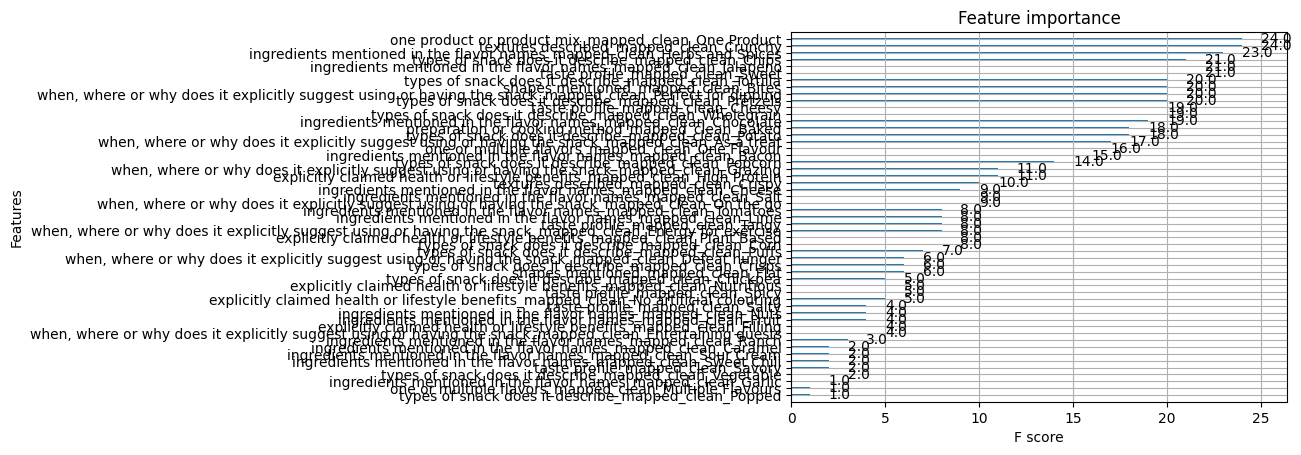

In [28]:
plot_importance(model)
plt.show()

## Actual vs. Predicted Plot

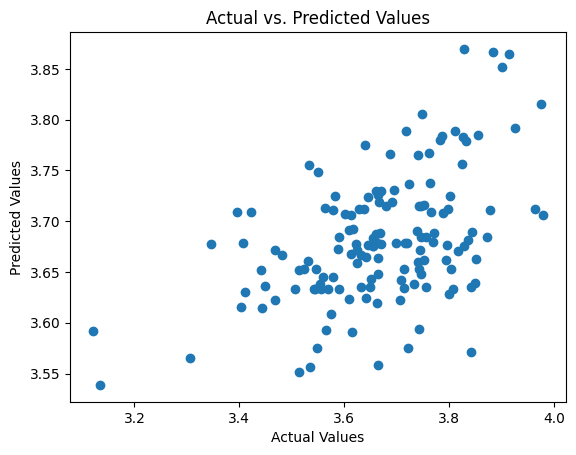

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()